#### Определение формулы для расчета заработной платы.

In [1]:
import numpy as np
import pandas as pd
import warnings
import seaborn as sns
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')

Для вещественных признаков попробуем рассмотреть матрицу корреляций (установим, что если коэффициент корреляции между двумя величинами < 0.0001, то мы считаем его нулевым):


Text(0.5, 1.0, 'Матрица корреляций для вещественных признаков датасета\n')

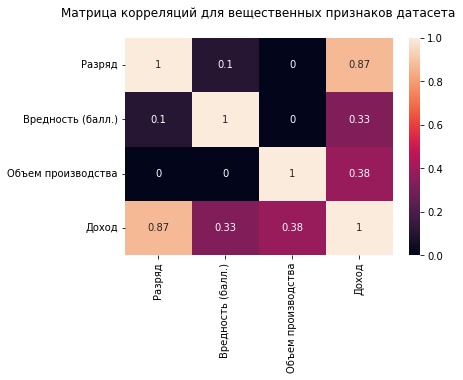

In [2]:
main_df = pd.read_excel('Задание 5.0 2 версия.xlsx')
corr = main_df.corr()
corr[corr < 1e-4] = 0

sns.heatmap(corr, annot = True, fmt='.2g')
plt.title('Матрица корреляций для вещественных признаков датасета\n')
# plt.show()

По матрице корреляций можно сделать следующие выводы:

***Вывод 1***: Между собой признаки линейно не коррелируют.

***Вывод 2***: Все признаки по отдельности имеют некоторую линейную корреляцию с доходом, наиболее сильно коррелирует доход и разряд.

Таким образом, оклад, скорее всего, определяется в основном разрядом работника. Попробуем построить зависимость между разрядом и доходом.

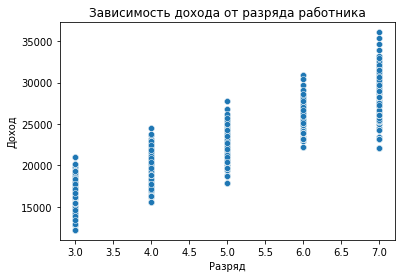

In [3]:
sns.scatterplot(data = main_df, x = "Разряд", y = "Доход")
plt.title('Зависимость дохода от разряда работника')
plt.show()

***Приближение 1***. Попробуем найти цену одного разряда.Для этого построим линейную аппроксимацию. Коэффициент наклона будет равен цене одного разряда.

In [4]:
from sklearn.linear_model import LinearRegression
lvl_df = main_df.drop(columns = ['FIO', 'Месяц', 'Профессия', 'Оборудование', 'Вредность (балл.)', 'Объем производства'])

regr_lvl = LinearRegression()
y_= lvl_df['Доход']
X_ = lvl_df.drop(columns = ['Доход'], inplace = False)

regr_lvl.fit(X_, y_)

y = regr_lvl.predict(X_)
print(f'Коэффициент наклона равен {round(*regr_lvl.coef_, 0)}')

Коэффициент наклона равен 2970.0


***Вывод 3.*** цена одного разряда составляет примерно 2970 руб.

***Приближение 2.*** Уровень вредости определяет профессия (кроме профессии "Уборщик"). Данное приближение позволяет сказать, что нам не столько важна профессия, сколько важен уровень ее вредности.

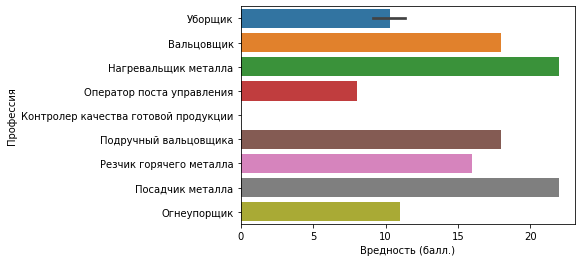

In [5]:
# Барплот профессия - вредность

sns.barplot(y = "Профессия", x = "Вредность (балл.)", data = main_df)

plt.show()

Действительно, отличия работников по уровню вредности могут встречаться лишь в случае уборщиков (только для них приведен ненулевой доверительный интервал).

Рассмотрим профессии и оборудование с точки зрения объёма производства.

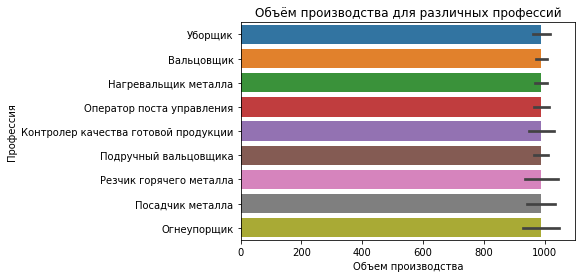

In [6]:
sns.barplot(y = "Профессия", x = "Объем производства", data = main_df, estimator = np.mean)
plt.title('Объём производства для различных профессий')
plt.show()

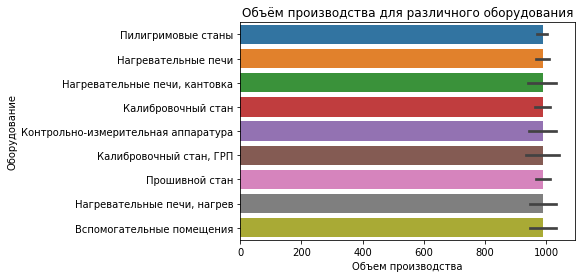

In [7]:
sns.barplot(y = "Оборудование", x = "Объем производства", data = main_df, estimator = np.mean)
plt.title('Объём производства для различного оборудования')
plt.show()

***Вывод 4.*** Объём производства в среднем одинаков для любой профессии и для любого оборудования и составляет 1000 единиц.

Далее попробуем построить мультилинейную регрессию для вредности и объёма производства.

***Приближение 3.*** Давайте предположим, что премию получают, если выполняют работу в количестве не менее 1000 единиц. То есть коэффициент будем применять, если только значение 'Объем производства' будет превышать 1000.

In [8]:
df = main_df.copy() # копируем исходный массив данных

# удаляем ненужные столбцы, нам интересны только вредность и объём производства.
df = df.drop(columns = ['FIO', 'Месяц', 'Оборудование','Профессия', 'Разряд'])

y_ = df['Доход']
X_= df.drop(columns = ['Доход'])
X_
regr = LinearRegression()
regr.fit(X_, y_)

y = regr.predict(X_)

min(y_ - y), max(y_ - y)
pd.DataFrame(data = np.array([regr.feature_names_in_, np.round(regr.coef_, 0)]).T, columns =  ['Предиктор','значение'], )

,Предиктор,значение
0,Вредность (балл.),233.0
1,Объем производства,8.0


Для получения информации о библиотеках снять комментарий:

In [10]:
# pip freeze > requirements.txt #даёт все библиотеки, которые были исользованы при решении задачи.

Note: you may need to restart the kernel to use updated packages.
